---
# Machine Learning - Assignment 1
#### Cristóbal Sánchez Moreno - 100510664
#### Francisco Wagner Manetti - 100533319
#### 07/03/2025
---

# 1. Data setup

In this section we are going to load the data, perform a quick EDA and define the preprocessing steps.

## 1.1 Data loading and quick "EDA"

Let's load the data and visualize the first 5 rows to get familiar with it.

In [1]:
import pandas as pd

# Load data as pandas dataframe
data = pd.read_excel("ENB2012_data.xlsx")

# Take a first glance at the data:
data.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


We can directly get the datatypes, number of instances and number of non-null elements by means of:

In [2]:
# Gather extra information regarding the data types and null (missing) values:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


From the previous two outputs we can already see that all the variables (features $X_i$ and tagets $Y_j$) are numerical, hence we won't be needing to apply any indexing and/or encoding. Additionally, the very last output indicates that we have a total of 768 data instances within our dataset and that for none of the variables missing values are present. In consequence, neither imputation nor any other kind of technique for missing values handling shall be required. The following code performs a quick summary of the main statistical quantities of each variable:

In [3]:
# Get a quick statistical summary of the data:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


We could now wonder if there are non-useful variables in terms of predictability, i.e., constant columns or identifiers (columns that take a differente value for each instance). Taking a look at the minimum and maximum value for each variable within the previous statistics table we can directly see that there are not such constant columns. As for the identifiers:

In [4]:
ids = []
for i in data:
    if data[i].nunique() == data.shape[0]:
        ids.append(i)

if len(ids) == 0:
    print("There are not id columns.")
else:
    print("The id variables are:", ids)

There are not id columns.


Now, we are going to perform some quick EDA so that we can get a better picture of the behaviour of the data. In order to do so, we are going to firstly divide the data into the features and the targets:

In [5]:
X = data.iloc[:,0:8] # Select features
y = data.iloc[:,8:10] # Select targets

Then, plotting some histograms to check distributions:

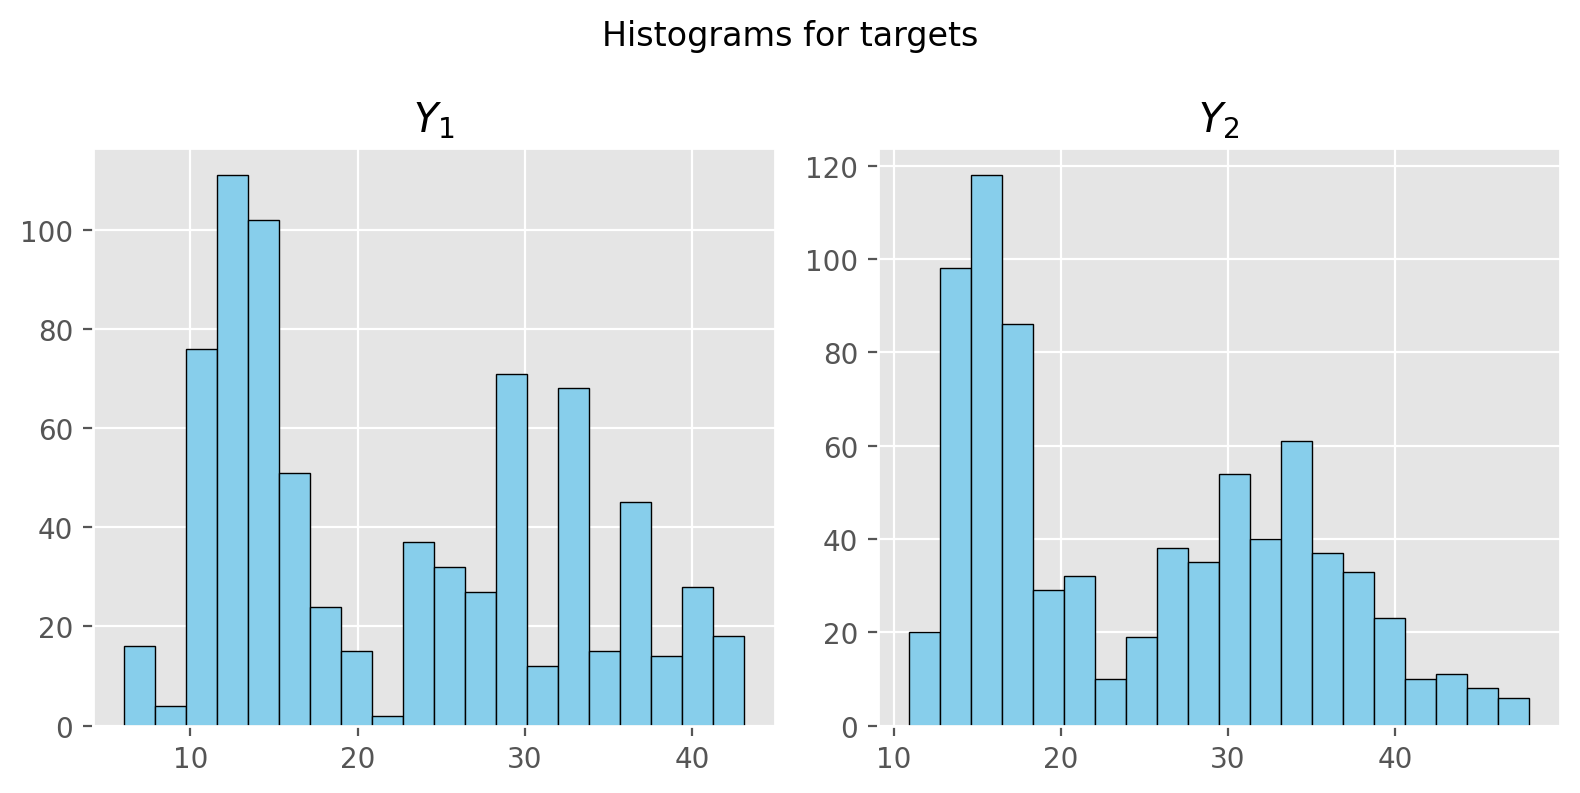

In [6]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' # Improve plots' quality
plt.style.use('ggplot') # Use ggplot style

# ---------------- Targets distributions -----------------

# Plot histograms for the targets Y1 and Y2:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))  # 1 row, 2 columns

axes[0].hist(y["Y1"], edgecolor="Black", bins=20, color="skyBlue") # First plot: Y1
axes[0].set_title("$Y_1$")

# Second plot
axes[1].hist(y["Y2"], edgecolor="Black", bins=20, color="skyBlue") # Second plot: Y2
axes[1].set_title("$Y_2$")

fig.suptitle("Histograms for targets")

plt.tight_layout()
plt.show() # Show plots

We can notice that both targets follow a pretty similar distribution.

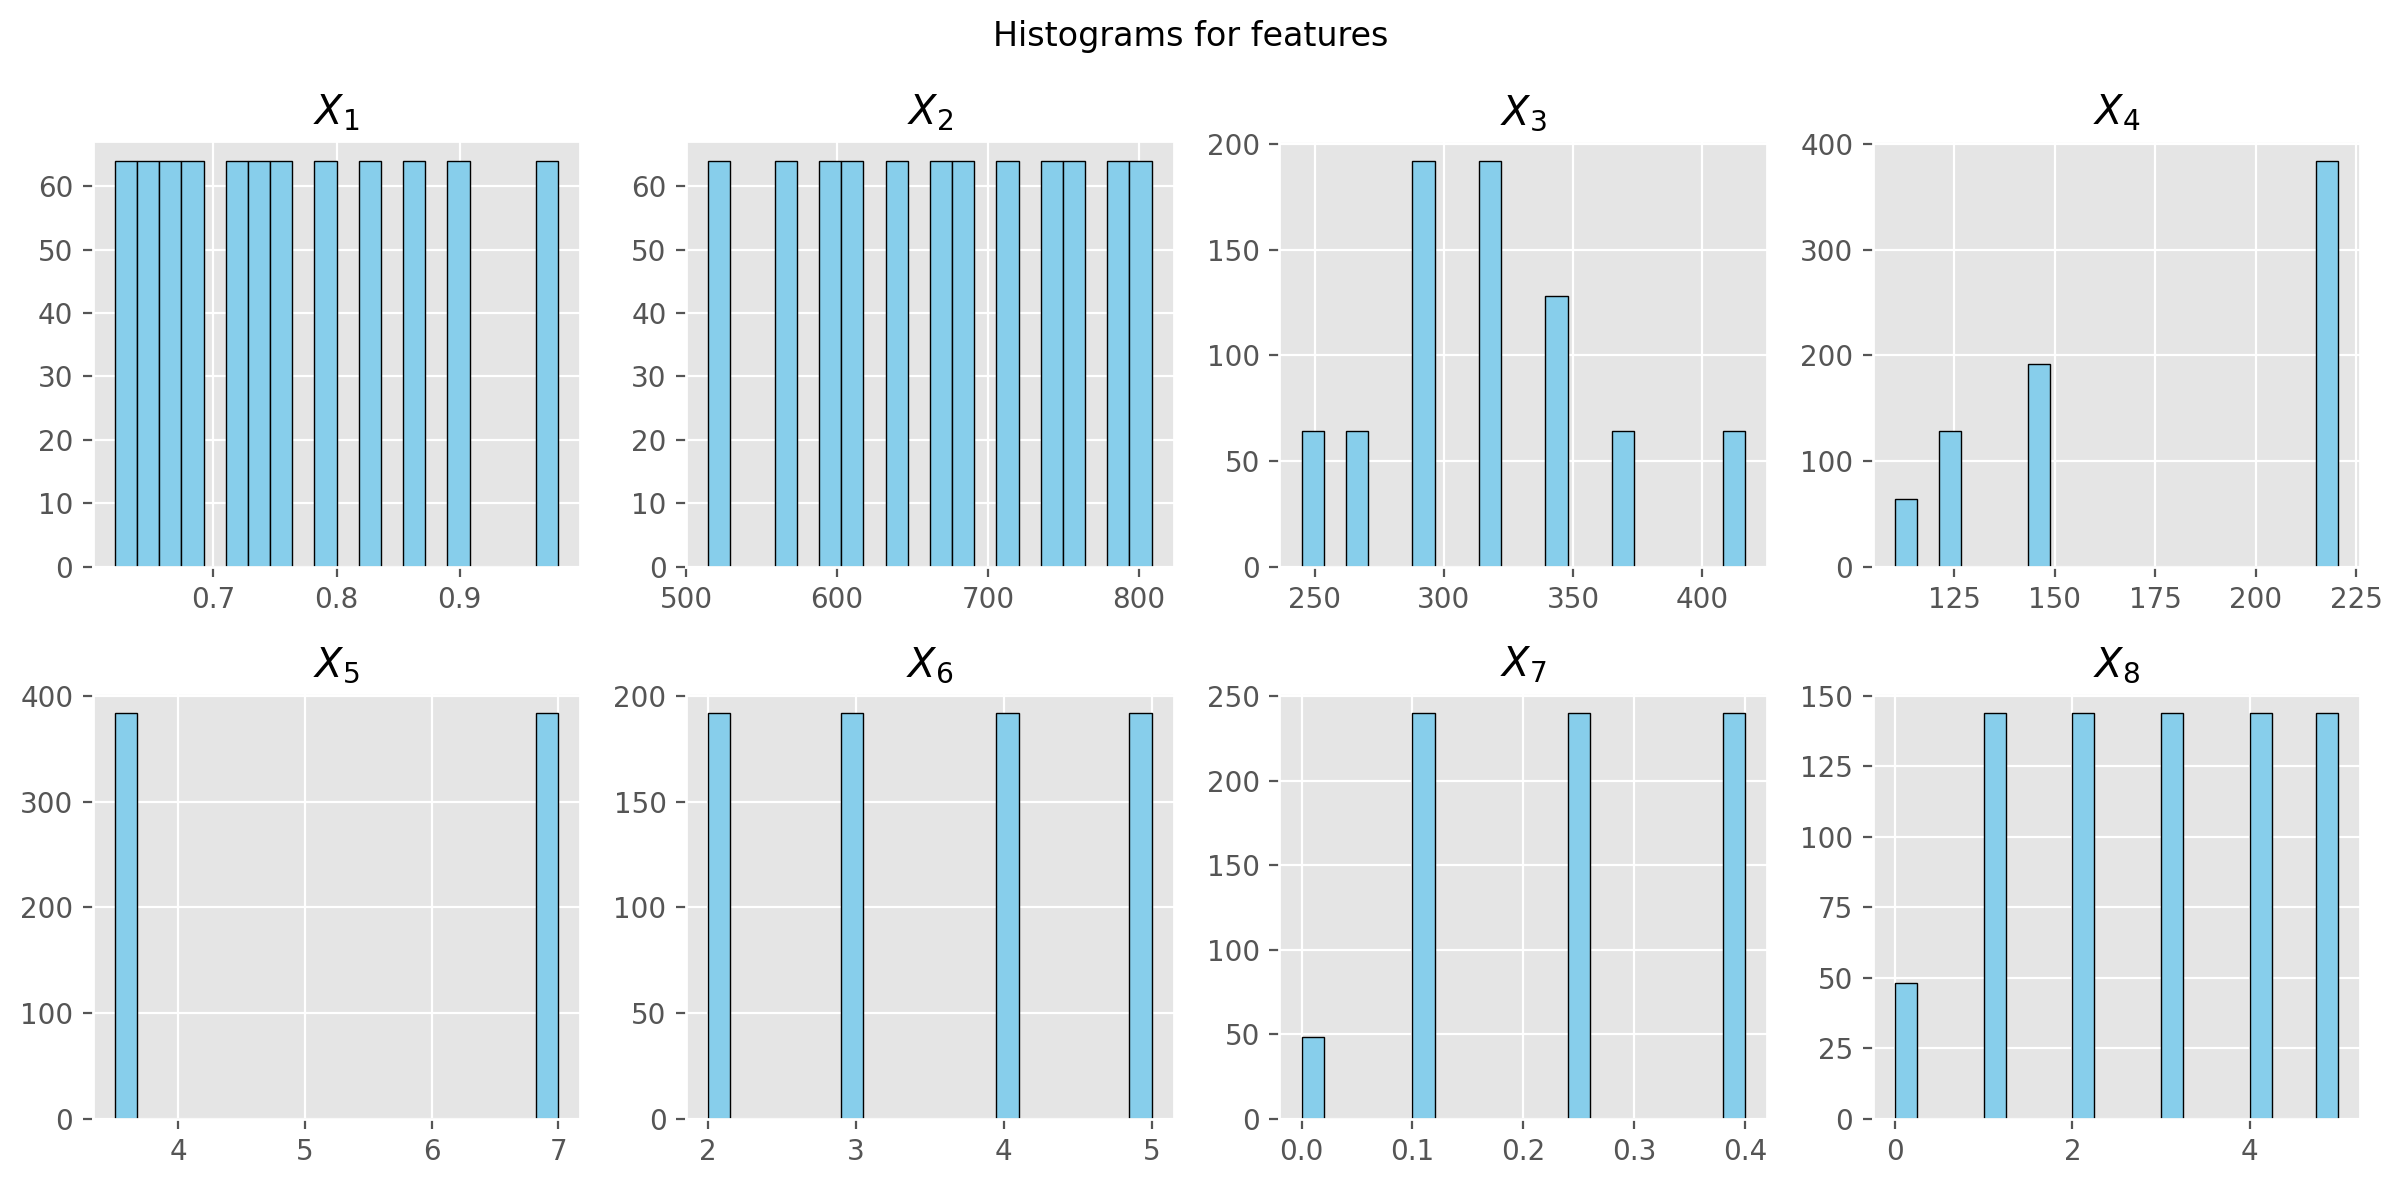

In [7]:
# ---------------- Variables distributions -----------------

# Plot histograms for the features X_i
fig2, axes2 = plt.subplots(2, 4, figsize=(12, 6))  # 2 row, 4 columns

# Iterate over all axes plotting each feature histogram
k = 0
for i in range(2):
    for j in range(4):
        axes2[i,j].hist(X.iloc[:,k], edgecolor="Black", bins=20, color="skyBlue")
        axes2[i,j].set_title(f"$X_{k+1}$")
        k += 1

fig2.suptitle("Histograms for features")

plt.tight_layout()
plt.show() # Show plots

These histogram are not very insightful. Now, we can also plot a correlation heatmap in order to check which are the most correlated variables. We are going to compute the correlations between all variables, features and targets.

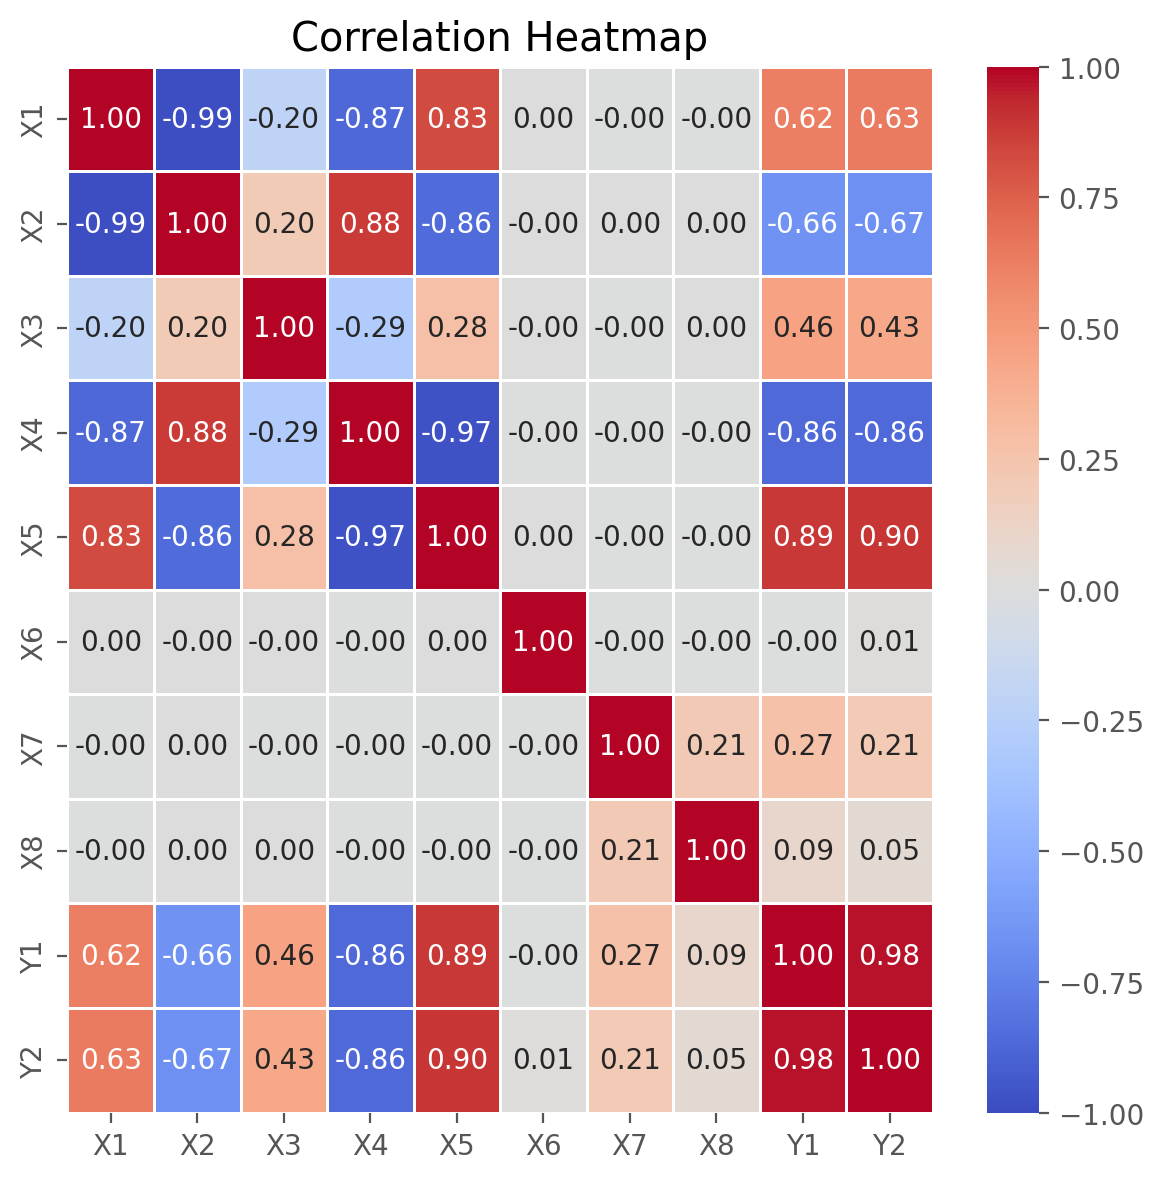

In [8]:
import seaborn as sns

corr_matrix = data.corr() # Compute correlations

plt.figure(figsize=(6, 6))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')

# Show heatmap
plt.tight_layout()
plt.show()

The very first thing that we can notice is that, in terms of linear correlation, not all variables are having a direct influence over the targets. Only $X_l$ with $l=1,2,3,4,5$ and maybe $l=7$ present a relevant linear influence over $Y_1$ and $Y_2$. Another noticeable point is that there is a strong correlation between both targets. Lets plot them:

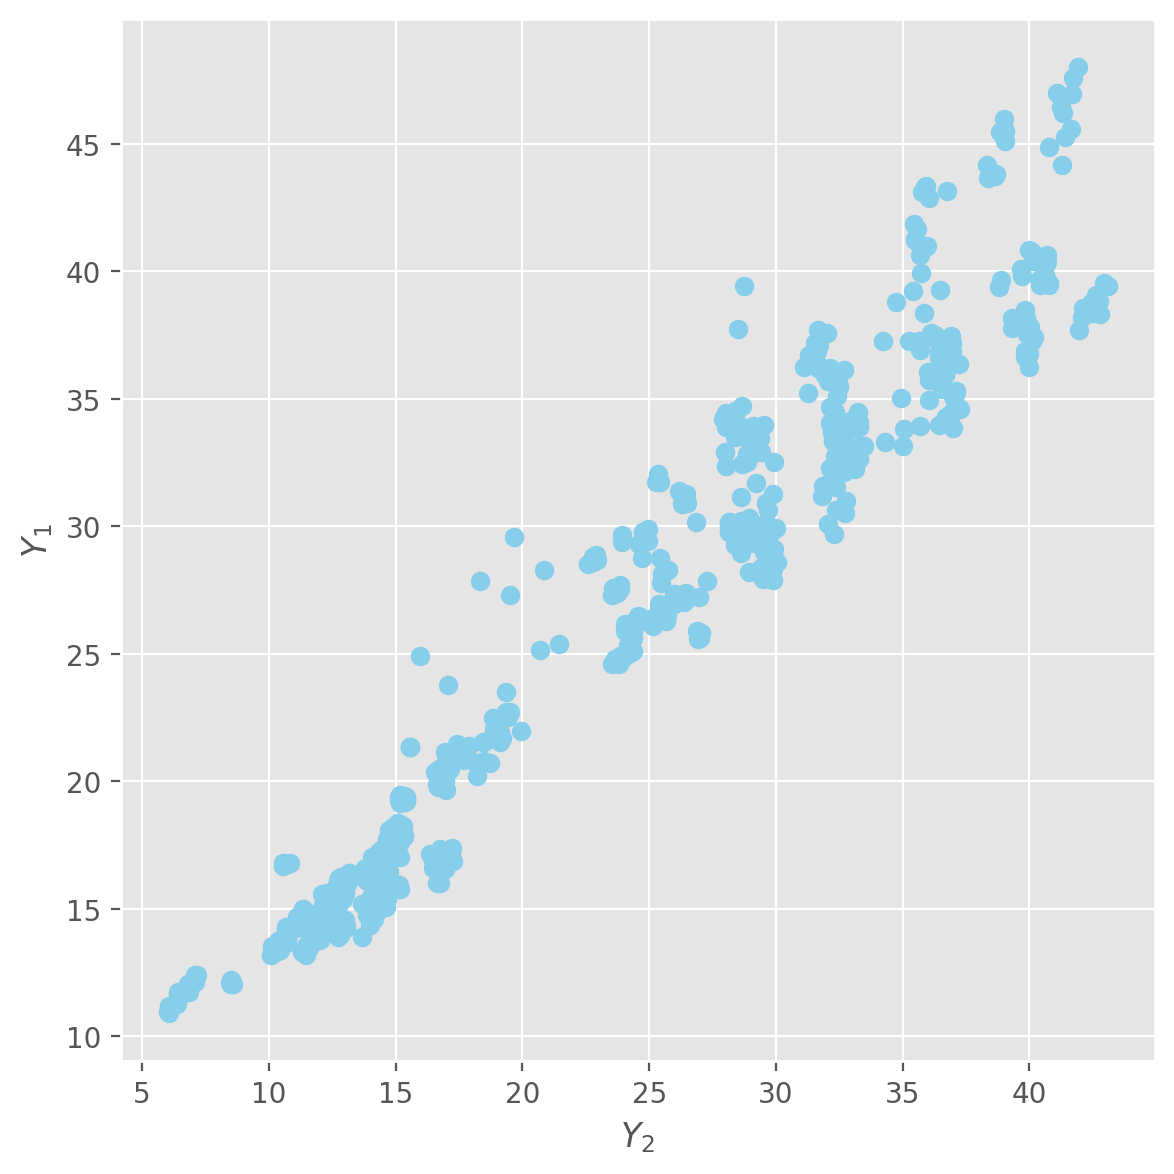

In [9]:
plt.figure(figsize=(6,6)) 

plt.plot(y["Y1"], y["Y2"], 'o', color="skyBlue")
plt.xlabel("$Y_2$")
plt.ylabel("$Y_1$")

plt.tight_layout()
plt.show()

From these two main insights two main hypothesis follows:

- For simple prediction models such as linear regressions (regularized or not) it might be interesting to use the most correlated features alone: This is quite likely to result in similar performance measures and still reducing the amount of training data, hence reducing the training time as our database scales.
- If we are to consider more complex ensemble methods that tend to increase the computational cost when using big training datasets, it might be interesting to train them only once, predicting only over one target. Then, we might be able to find a simple linear regression for the other target in terms of the one already predicted by the complex model (and maybe other features). As the correlation between both targets is rather high, we might be able to find a good enought prediction over the second target while avoiding to train another computationally costly model and hence saving time.

However, for our first-approach purposes we will restrict ourselves to studying all our models predicting each target separately.

## 1.2 Preprocessing setup

Now, we are going to build the preprocessing pipeline. The main preprocessing steps are going to be a scaling and a Principal Component Analysis, though we will compare the cases in which we use the both, a single scaler and none of these techniques. 

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.decomposition import PCA

# Define all the preprocessors within a dictionary:
preprocessors = {"None": Pipeline([("none", FunctionTransformer())]),
                 "Scaler": Pipeline([("scaler", StandardScaler())]),
                 "Scaler + PCA": Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=4))])
                 }

# 2. Models training and evaluation for comparison

In this section we are going to train and estimate the performance for multiple methods (applying an HPO process when applicable). We will divide our dataset into training and testing partitions, performing such estimation over the training partition of each target $Y_1$ and $Y_2$ and using a 5-fold cross-validation. Each method shall be evaluated with each possible preprocessor. Once all methods have been evaluated, the best one will be chosen and its final estimation of future performance will be taken over the testing partition (over the training as well just for comparison). As there is not a big amount of data we will use 3/4 of our data for training (surpassing the heuristic 2/3), giving a bigger relevance to the training process as compared to the estimation of performance accuracy. The methods we shall consider are:

- A dummy regressor predicting always as the average. This shall serve as a benchmark for us, i.e., a worst case scenario whose performance should be worse than any other model for that model to be consider at least valid.
- A standard linear regression.
- A Lasso linear regression: This shall be a regularized regression.
- A Kernel Ridge regression (KR): This will be implementing kernel methods. In particular, we shall consider the RBF and polynomial kernels.
- A Support Vector Regressor (SVR): Same kernels as in the previous method will be tried.
- A Gradient Boosting Regressor (GB): This is an ensemble method that is expected to have the best performance.

These, combined with 3 preprocessing scenarios results in a total of 18 models to be tested and compared. On the other hand, we shall consider the following metrics:

- Negative mean squared error.
- $R^2$.

First, we take the train/test split and then we define the methods, their parameters' grids and the scores to be used:

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.dummy import DummyRegressor
from sklearn.svm import SVR
import numpy as np


# Fix the seed for reproducibility:
seed = 15


# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=seed)


# Define models to consider
models = {
    'Dummy Regressor': DummyRegressor(strategy='mean'),
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(random_state=seed, max_iter=10000),
    'KernelRidge': KernelRidge(),
    'Support Vector Regression': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=seed)
}

# Define parameters for each model
params = {
    'Lasso': {
        'regressor__alpha': np.logspace(-4, 2, 7)
    },
    'KernelRidge': {
        'regressor__alpha': np.logspace(-4, 2, 7),
        'regressor__kernel': ['poly', 'rbf'],
        'regressor__gamma': [0.1, 0.3, 0.4],
        'regressor__degree': [2, 3, 4]
    },
    'Support Vector Regression': {
        'regressor__C': [.1, 1, 10, 100],
        'regressor__kernel': ['poly','rbf']
    },
    'Gradient Boosting': {
        'regressor__learning_rate': [0.01, 0.1, 0.3],
        'regressor__n_estimators': [100, 80, 60], 
        'regressor__min_samples_split': [2, 10, 20]
    }
}

# Define scorers to evaluate models
scorers = {
    'neg_mean_squared_error': 'neg_mean_squared_error', # average squared difference between predicted and actual values, sensitive to outliers
    'r2': 'r2', # proportion of variance in the target variable that is predictable from the features
}

Now, we proceed to iterate over each combination of method-preprocessor to compute the HPO and estimate the performance over the training partition for each target. The results are shown in the output table:

In [12]:
from sklearn.model_selection import GridSearchCV, KFold, cross_validate

# Create inner 5-fold cross validator for model evaluation
inner = KFold(n_splits=5, shuffle=True, random_state=seed)

# Initialize a list to store results and dictionary to store best models
results = []
best_models = {}

# Create list of tuples for Y data, for Y1 it would be ('Y1', y_train['Y1'])
targets = [(col, y_train[col]) for col in y_train.columns]

# Loop through each Y
for target_name, y_train_target in targets:
    # Loop through each preprocessor
    for preprocessor_name, preprocessor in preprocessors.items():
        # Loop through each model
        for model_name, regressor in models.items():
            print("Evaluating",target_name,preprocessor_name,"and",model_name)

            # Create a pipeline with preprocessing and the model
            pipeline = Pipeline(steps=[
                ('preprocessor', preprocessor),
                ('regressor', regressor)
            ])

            # Hyperparameter optimization with grid search
            if model_name in params:
                grid_search = GridSearchCV(
                    pipeline,
                    params[model_name],
                    scoring = scorers, # scores of all the scorers are available in the cv_results_
                    refit = 'r2', # best model is tuned using r2
                    cv = inner,
                    return_train_score = False,
                    n_jobs = -1 # use all processors
                )
                grid_search.fit(X_train, y_train_target)

                # Extract results from grid_search
                best_model = grid_search.best_estimator_
                cv_results = pd.DataFrame(grid_search.cv_results_)
                best_index = grid_search.best_index_
                best_results = cv_results.loc[best_index]

                fit_time = np.mean(best_results['mean_fit_time'])
                score_time = np.mean(best_results['mean_score_time'])
                neg_mse = np.mean(best_results['mean_test_neg_mean_squared_error'])
                r2 = np.mean(best_results['mean_test_r2'])

            else: # for the dummy and linear regression model
                best_model = pipeline.fit(X_train, y_train_target)

                # Perform cross validation to get different metrics
                cv_results = cross_validate(
                    best_model,
                    X_train,
                    y_train_target,
                    scoring = scorers,
                    cv = inner,
                    n_jobs = -1 # use all processors
                )

                # Extract results
                fit_time = np.mean(cv_results['fit_time'])
                score_time = np.mean(cv_results['score_time'])
                neg_mse = np.mean(cv_results['test_neg_mean_squared_error'])
                r2 = np.mean(cv_results['test_r2'])

            # append results
            results.append({
                'Target': target_name,
                'Preprocessor': preprocessor_name,
                'Model': model_name,
                'Fit Time (s)': fit_time,
                'Score Time (s)': score_time,
                'Negative MSE': neg_mse,
                'R2': r2,
            })

            # Save best model
            if target_name not in best_models: # needed to add each Y
                best_models[target_name] = {}
            if preprocessor_name not in best_models[target_name]: # needed to add each preprocessor
                best_models[target_name][preprocessor_name] = {}
            best_models[target_name][preprocessor_name][model_name] = best_model

# Convert results list to a DataFrame
results_df = pd.DataFrame(results)
results_df

Evaluating Y1 None and Dummy Regressor


Evaluating Y1 None and Linear Regression
Evaluating Y1 None and Lasso
Evaluating Y1 None and KernelRidge


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=9.00792e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=9.17928e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=9.09469e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=9.45264e-18): result may n

Evaluating Y1 None and Support Vector Regression
Evaluating Y1 None and Gradient Boosting
Evaluating Y1 Scaler and Dummy Regressor
Evaluating Y1 Scaler and Linear Regression
Evaluating Y1 Scaler and Lasso
Evaluating Y1 Scaler and KernelRidge
Evaluating Y1 Scaler and Support Vector Regression
Evaluating Y1 Scaler and Gradient Boosting
Evaluating Y1 Scaler + PCA and Dummy Regressor
Evaluating Y1 Scaler + PCA and Linear Regression
Evaluating Y1 Scaler + PCA and Lasso
Evaluating Y1 Scaler + PCA and KernelRidge
Evaluating Y1 Scaler + PCA and Support Vector Regression
Evaluating Y1 Scaler + PCA and Gradient Boosting
Evaluating Y2 None and Dummy Regressor
Evaluating Y2 None and Linear Regression
Evaluating Y2 None and Lasso
Evaluating Y2 None and KernelRidge


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=9.00792e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=9.17928e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=9.09469e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=8.736e-18): result may not

Evaluating Y2 None and Support Vector Regression
Evaluating Y2 None and Gradient Boosting
Evaluating Y2 Scaler and Dummy Regressor
Evaluating Y2 Scaler and Linear Regression
Evaluating Y2 Scaler and Lasso
Evaluating Y2 Scaler and KernelRidge
Evaluating Y2 Scaler and Support Vector Regression
Evaluating Y2 Scaler and Gradient Boosting
Evaluating Y2 Scaler + PCA and Dummy Regressor
Evaluating Y2 Scaler + PCA and Linear Regression
Evaluating Y2 Scaler + PCA and Lasso
Evaluating Y2 Scaler + PCA and KernelRidge
Evaluating Y2 Scaler + PCA and Support Vector Regression
Evaluating Y2 Scaler + PCA and Gradient Boosting


,Target,Preprocessor,Model,Fit Time (s),Score Time (s),Negative MSE,R2
0,Y1,None,Dummy Regressor,0.001084,0.001048,-100.224461,-0.015800
1,Y1,None,Linear Regression,0.001404,0.001190,-8.367998,0.915888
2,Y1,None,Lasso,0.005305,0.001034,-8.368114,0.915886
3,Y1,None,KernelRidge,0.006553,0.002545,-0.485692,0.995094
4,Y1,None,Support Vector Regression,0.008085,0.002936,-16.582993,0.832904
5,Y1,None,Gradient Boosting,0.039410,0.002428,-0.172859,0.998279
6,Y1,Scaler,Dummy Regressor,0.001154,0.000934,-100.224461,-0.015800
7,Y1,Scaler,Linear Regression,0.001272,0.000946,-8.367998,0.915888
8,Y1,Scaler,Lasso,0.004120,0.001040,-8.367984,0.915888
9,Y1,Scaler,KernelRidge,0.010321,0.003078,-0.258971,0.997415


The previous warnings happen whenever we try to use the KR method for the non-scaled features case. In those cases the kernel matrix is ill-conditioned and hence numerically unstable when trying to invert it. Then, we should not be considering the performance metrics as accurate for this particular case.

# 3. Model comparison and EFP

In order to properly visualize all the results in terms of the different scores, we are going to build a plot for each metric showing the performance of each method-preprocessor particularized for each target:

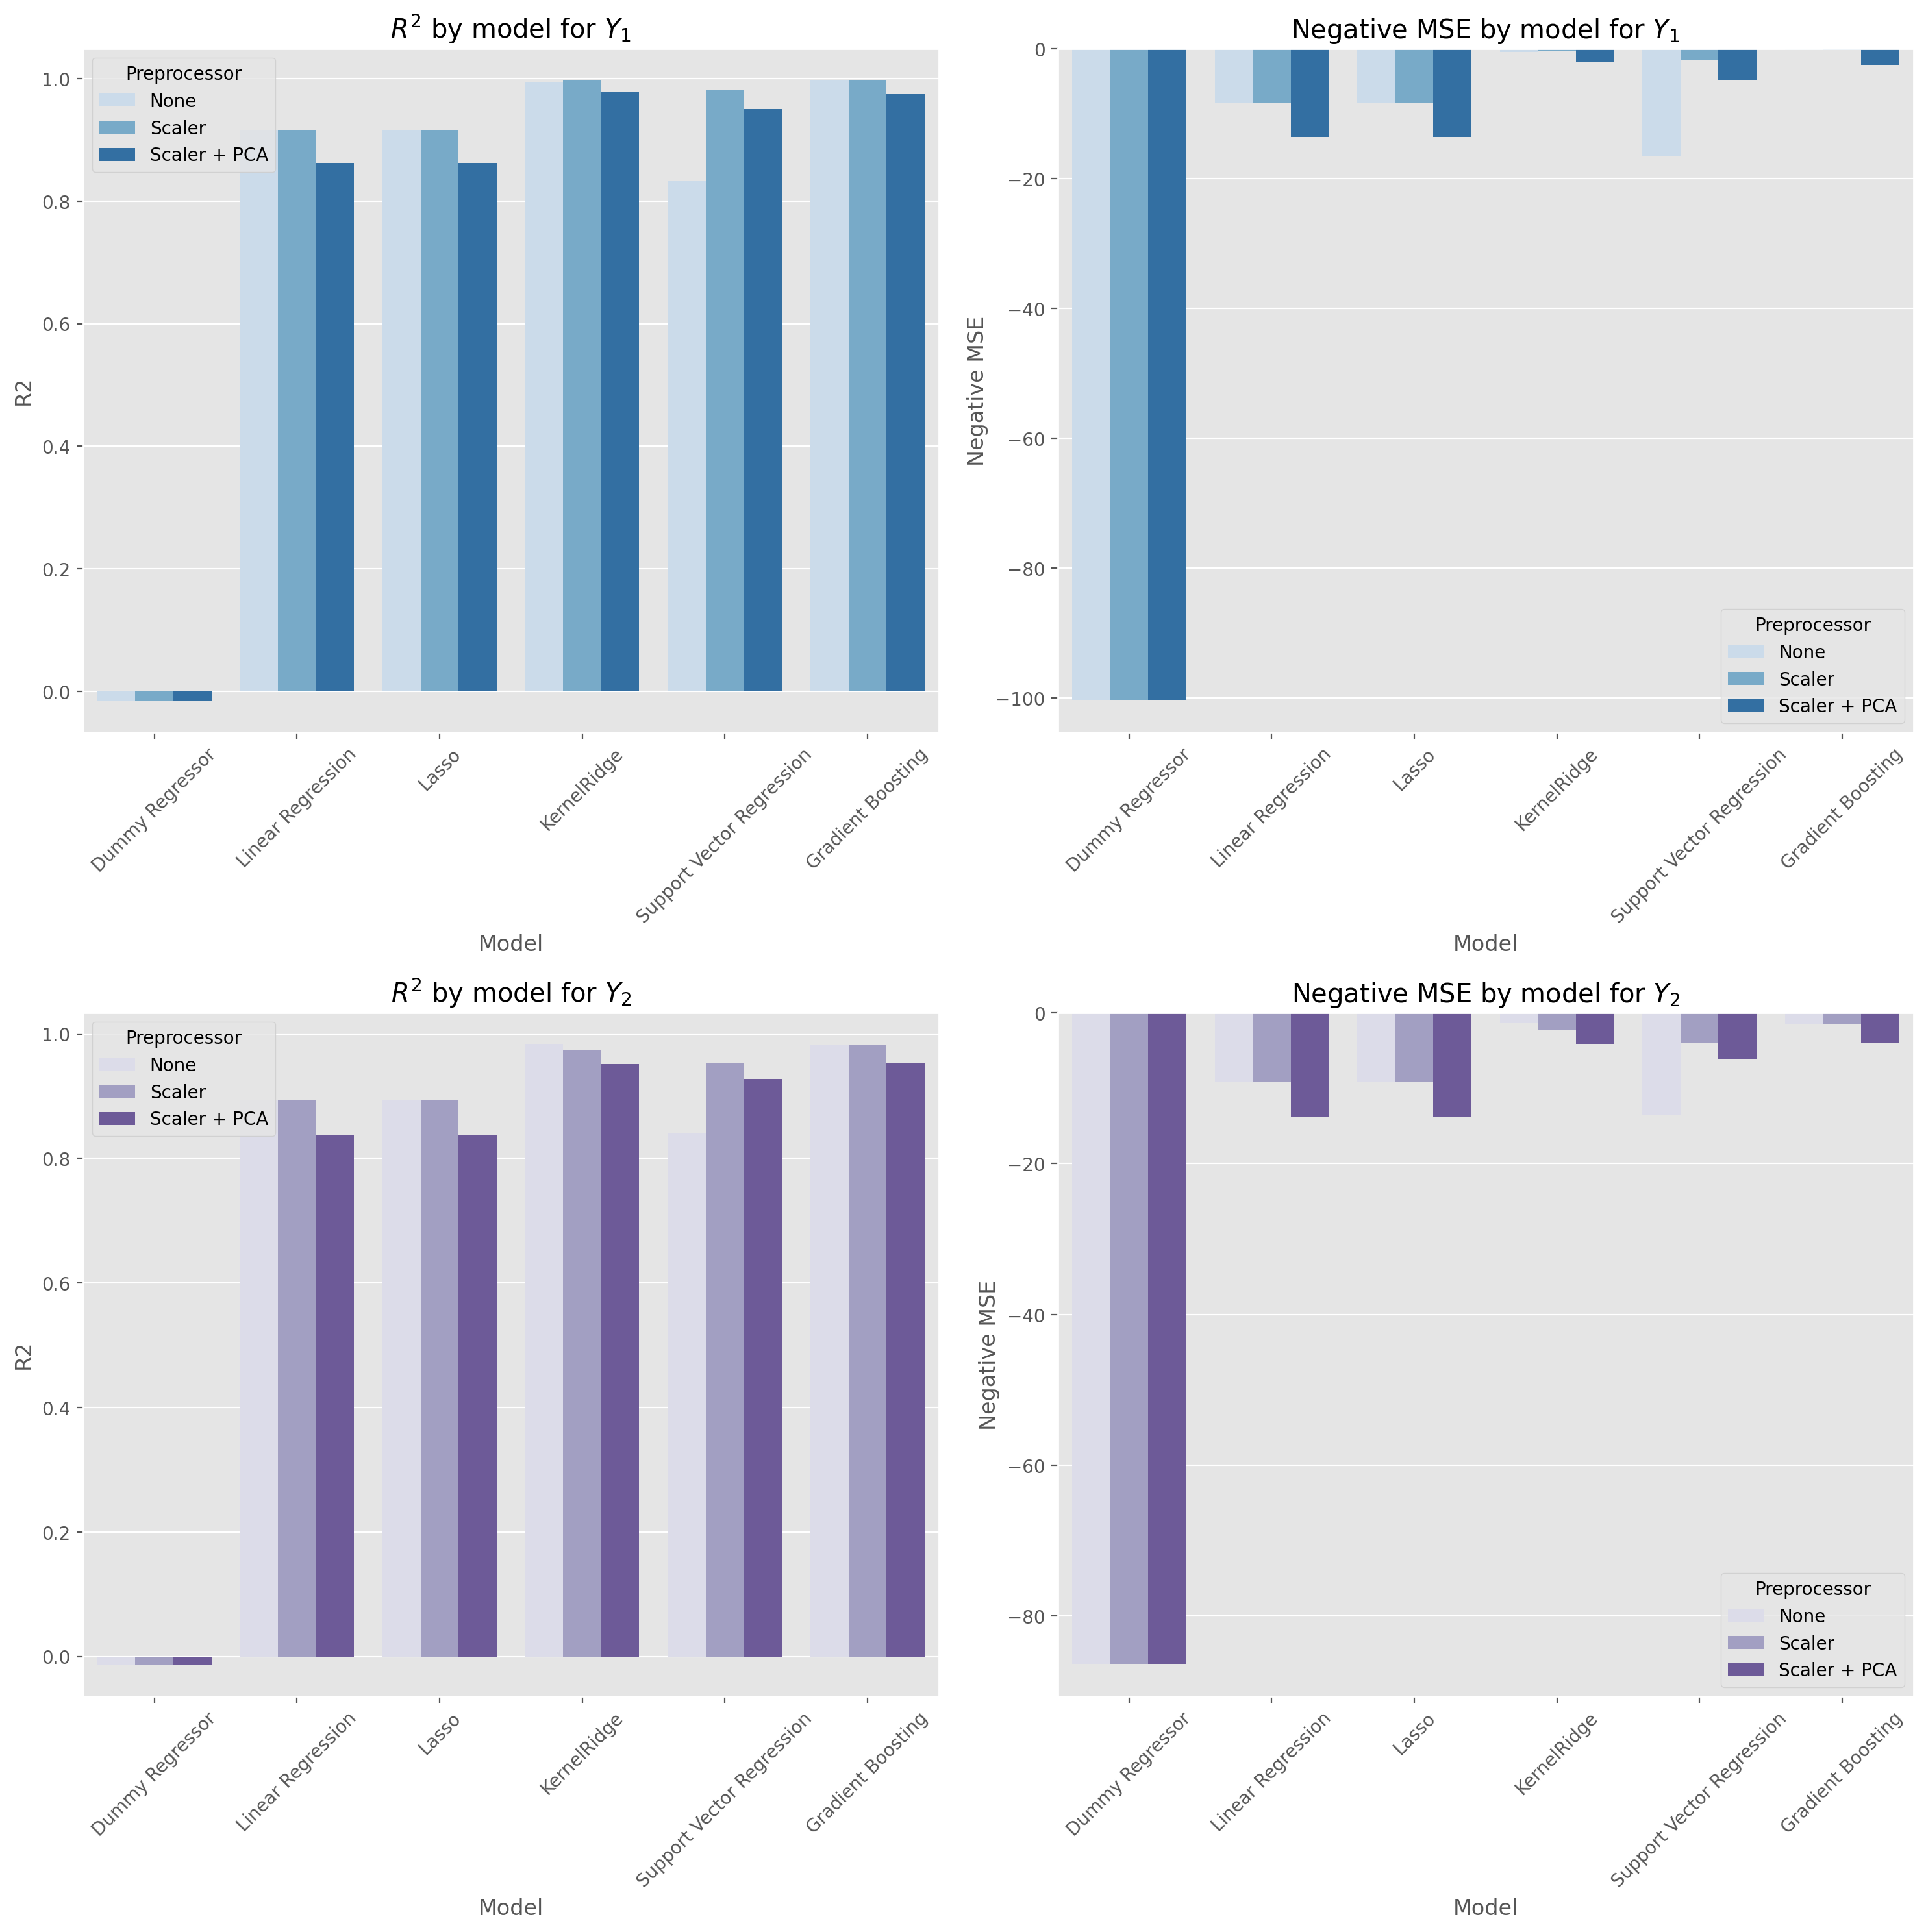

In [13]:
fig3, axes3 = plt.subplots(2,2, figsize=(15,15)) # Create multiplot figure

results_y1 = results_df[results_df["Target"]=="Y1"]
results_y2 = results_df[results_df["Target"]=="Y2"]

# Plot R2 metric for Y1
sns.barplot(data=results_y1, x='Model', y='R2', hue='Preprocessor', palette = "Blues", ax=axes3[0,0]) # Plot it
axes3[0,0].set_title("$R^2$ by model for $Y_1$") # Fix title
axes3[0,0].tick_params(axis='x', rotation=45) # Rotate x ticks

# Plot MSE metric for Y1
sns.barplot(data=results_y1, x='Model', y='Negative MSE', hue='Preprocessor', palette = "Blues", ax=axes3[0,1])
axes3[0,1].set_title("Negative MSE by model for $Y_1$")
axes3[0,1].tick_params(axis='x', rotation=45)

# Plot R2 metric for Y2
sns.barplot(data=results_y2, x='Model', y='R2', hue='Preprocessor', palette = "Purples", ax=axes3[1,0])
axes3[1,0].set_title("$R^2$ by model for $Y_2$")
axes3[1,0].tick_params(axis='x', rotation=45)

# Plot MSE metric for Y2
sns.barplot(data=results_y2, x='Model', y='Negative MSE', hue='Preprocessor', palette = "Purples", ax=axes3[1,1])
axes3[1,1].set_title("Negative MSE by model for $Y_2$")
axes3[1,1].tick_params(axis='x', rotation=45)

# SHow plot
plt.tight_layout()
#fig3.savefig("metrics_per_model_and_target", dpi=300, bbox_inches="tight") # Save figure (if uncommented)
plt.show()


Taking a look at these graphs, we can directly see that while the usage of PCA tends to degrade performance, the usage of scaling tends to increase it (leaving it unchanged in the worst-case scenario). Additionally, it follows quite straight-forwardly that the best overall model in the prediction of both targets is the GB. In particular, the best model is the one with GB plus only scaling as preprocessing (this is better observed at the results table). However, it must be noticed that KernelRidge, though obtaining a slightly worse performance as compared with GB, is approximately 6 times faster in terms of training time (see results table), i.e.

\begin{equation}
\dfrac{Fit \ Time(s) [GB+Scaler]}{Fit \ Time (s) [KR+Scaler]} \sim 6
\notag
\end{equation}

and so KR could be a good solution as well. Still, as our dataset is sufficiently small we will stick to the GB + Scaling model, choosing it as best model and predicting over the testing partition in order to compute the stimation of future performance metrics.

In [14]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score

# Chose Gradient Boosting as best model for all Y since it has best scores overall
chosen_model = {}
chosen_model['Y1'] = best_models['Y1']['Scaler']['Gradient Boosting']
chosen_model['Y2'] = best_models['Y2']['Scaler']['Gradient Boosting']

# Initialize a list to store the metrics
metrics_list = []

# Loop through each target
for target_name in y_test.columns:
    # Make predictions based on the model
    y_train_pred = chosen_model[target_name].predict(X_train)
    y_test_pred = chosen_model[target_name].predict(X_test)

    # Calculate metrics for train data
    train_r2 = r2_score(y_train[target_name], y_train_pred)
    train_neg_mse = -mean_squared_error(y_train[target_name], y_train_pred)
    train_neg_mae = -mean_absolute_error(y_train[target_name], y_train_pred)
    train_explained_variance = explained_variance_score(y_train[target_name], y_train_pred)

    # Calculate metrics for test data
    test_r2 = r2_score(y_test[target_name], y_test_pred)
    test_neg_mse = -mean_squared_error(y_test[target_name], y_test_pred)
    test_neg_mae = -mean_absolute_error(y_test[target_name], y_test_pred)
    test_explained_variance = explained_variance_score(y_test[target_name], y_test_pred)

    # Append metrics to the list
    metrics_list.append({
        'Target': target_name,
        'Dataset': 'Train',
        'R2': train_r2,
        'Negative MSE': train_neg_mse,
    })
    metrics_list.append({
        'Target': target_name,
        'Dataset': 'Test',
        'R2': test_r2,
        'Negative MSE': test_neg_mse,
    })

metrics_df = pd.DataFrame(metrics_list)
metrics_df

,Target,Dataset,R2,Negative MSE
0,Y1,Train,0.999079,-0.091833
1,Y1,Test,0.998650,-0.143494
2,Y2,Train,0.989842,-0.872486
3,Y2,Test,0.984710,-1.556345
